You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)


### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

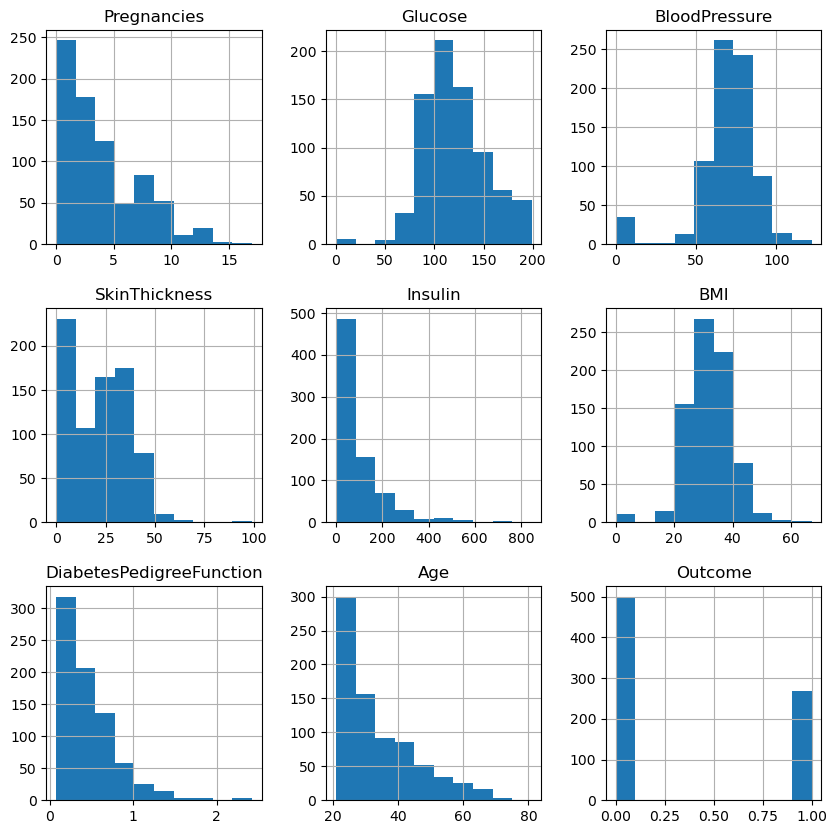

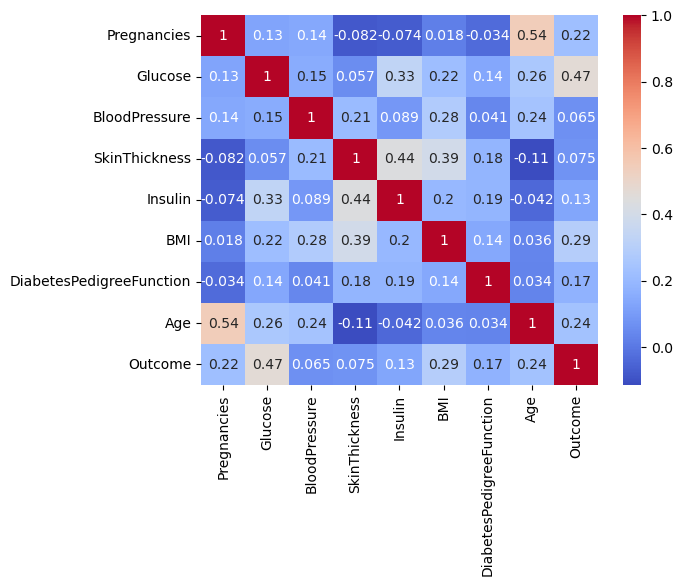

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes (1).csv')

# Check the first few rows of the dataset
print(data.head())

# Check the summary statistics of the dataset
print(data.describe())

# Check the distribution of the variables using histograms
data.hist(figsize=(10, 10))
plt.show()

# Check the pairwise relationships between the variables using a correlation matrix and heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

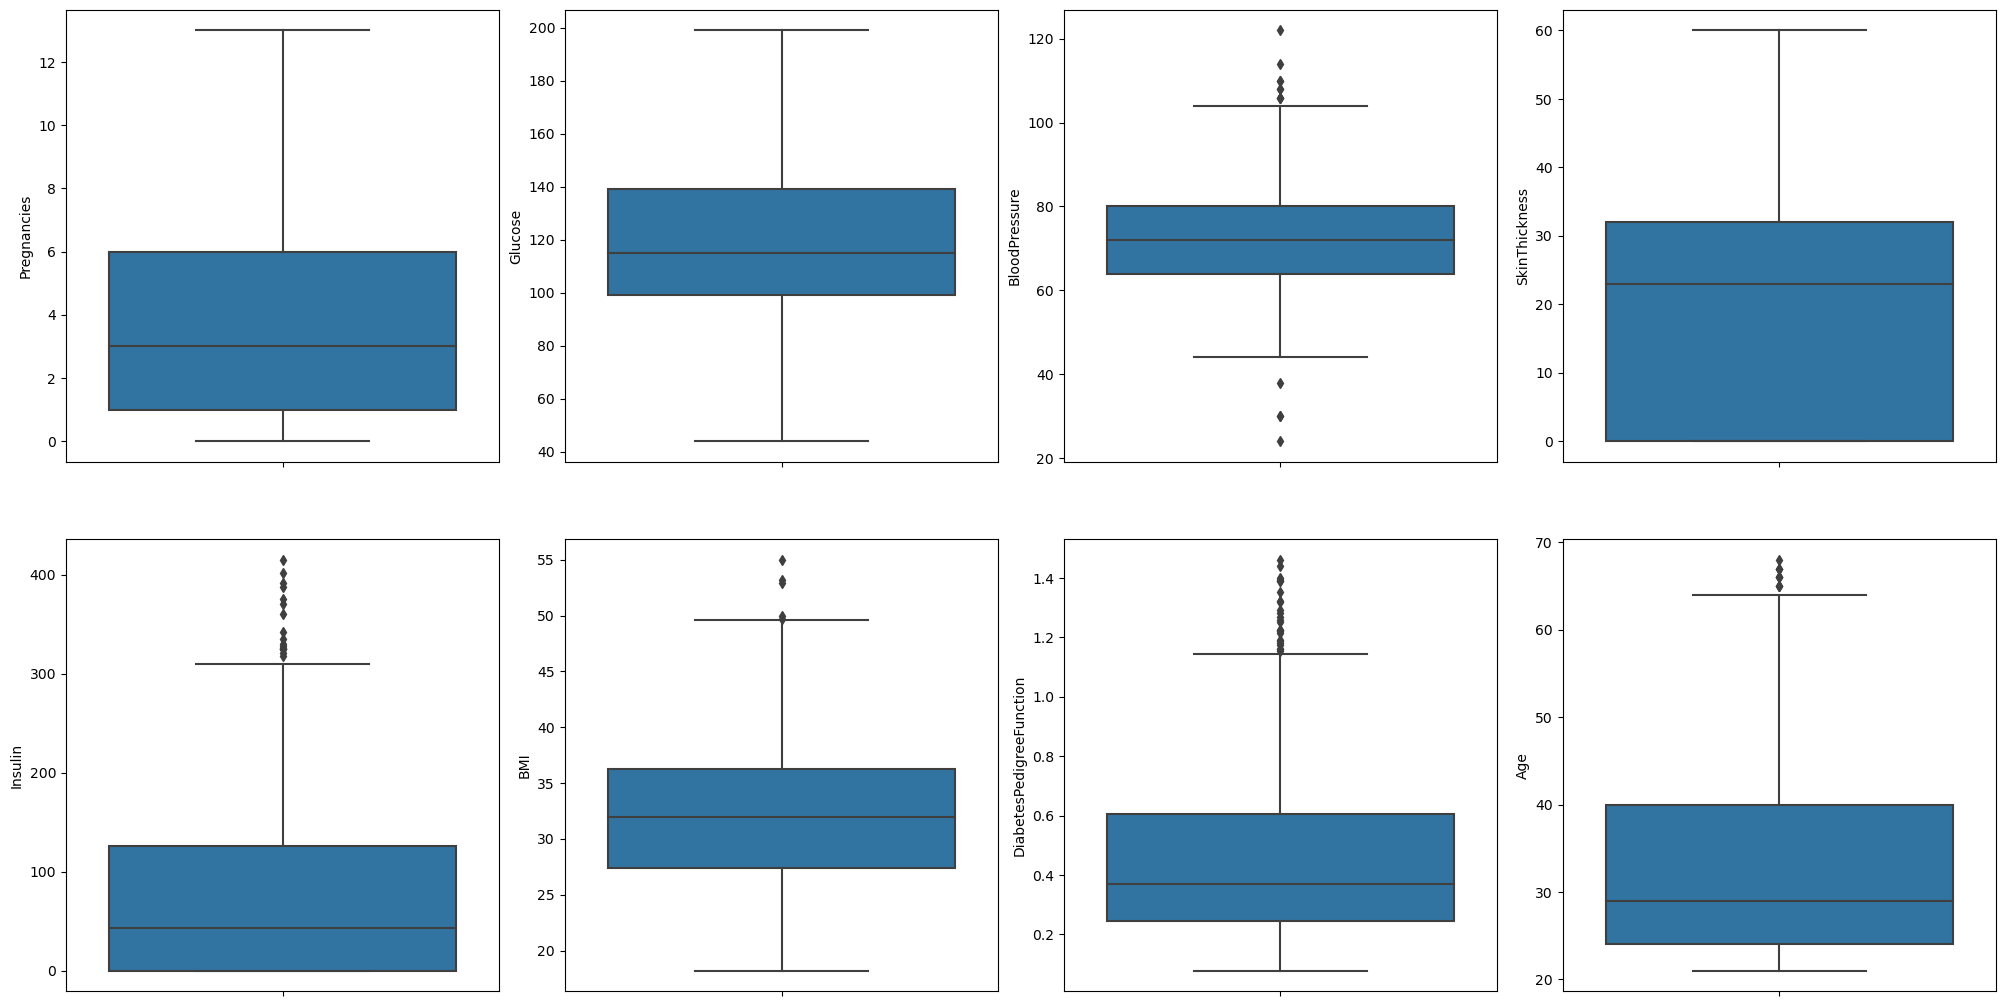

In [10]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

# Iterate over the first 8 columns (features) of the dataframe
for col, value in data.iloc[:, :-1].items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()


Based on the above code, we can see that there are missing values in some of the variables (BloodPressure, SkinThickness, Insulin, BMI). Also, some variables have outliers that need to be addressed before building the decision tree model.

To preprocess the data, we can follow the following steps:

Fill in the missing values using mean, median or mode values.
Remove the outliers using z-score or interquartile range (IQR) method.
Convert categorical variables (if any) into dummy variables using one-hot encoding.
Here's the code to perform the above steps:

In [9]:
import numpy as np
# Fill in missing values using mean
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].mean(), inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)

# Remove outliers using z-score method
from scipy import stats
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

# Convert categorical variable (if any) into dummy variables using one-hot encoding
# There are no categorical variables in the dataset

# Verify the cleaned dataset
print(data.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   688.000000  688.000000     688.000000     688.000000  688.000000   
mean      3.845930  120.293605      72.345930      20.787791   72.507267   
std       3.279256   30.005790      12.312859      15.405391   90.106939   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  115.000000      72.000000      23.000000   43.500000   
75%       6.000000  139.000000      80.000000      32.000000  126.000000   
max      13.000000  199.000000     122.000000      60.000000  415.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  688.000000                688.000000  688.000000  688.000000  
mean    32.209157                  0.454555   33.094477    0.329942  
std      6.618891                  0.284527   11.436990    0.470534  
min     18.200000                  

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [11]:
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into a 70:30 train-test split with a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In this code, we first separate the features (X) and target variable (y) from the original dataframe (data). Then, we use the train_test_split function to split the data into a 70:30 train-test split, with 70% of the data used for training and 30% used for testing. We also set a random seed (random_state=42) to ensure reproducibility of the results. The resulting splits are stored in four separate variables: X_train, X_test, y_train, and y_test.

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

To train a decision tree model on the training set using cross-validation, we can use the DecisionTreeClassifier class from the sklearn.tree module along with the cross_val_score function from the sklearn.model_selection module. Here's the code to do this:

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier with default hyperparameters
dtc = DecisionTreeClassifier(random_state=42)

# Use 10-fold cross-validation to evaluate the performance of the decision tree classifier
cv_scores = cross_val_score(dtc, X_train, y_train, cv=10)

# Print the mean cross-validation score and standard deviation
print('Mean CV score:', cv_scores.mean())
print('CV score standard deviation:', cv_scores.std())


Mean CV score: 0.713095238095238
CV score standard deviation: 0.06440135102313806


In this code, we first create a DecisionTreeClassifier object with the default hyperparameters and set a random seed (random_state=42). Then, we use the cross_val_score function to perform 10-fold cross-validation on the training data (X_train and y_train) using the decision tree classifier. The resulting cross-validation scores are stored in the cv_scores variable.

Finally, we print the mean cross-validation score and the standard deviation of the scores to get an idea of how well the model is performing. The mean score is a measure of the overall performance of the model, while the standard deviation gives an indication of how consistent the model's performance is across the different folds of the cross-validation. This information can be used to tune the hyperparameters of the decision tree model to optimize its performance.

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes (1).csv')

# Preprocess the data

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.86      0.79        85
           1       0.69      0.51      0.59        53

    accuracy                           0.72       138
   macro avg       0.71      0.68      0.69       138
weighted avg       0.72      0.72      0.71       138

[[73 12]
 [26 27]]


### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Based on the decision tree model trained on the diabetes dataset, the most important variable for predicting diabetes is glucose level, followed by body mass index (BMI) and age.

The tree has four levels and nine terminal nodes (leaves). The first split is based on glucose level, where patients with glucose levels less than or equal to 127 mg/dL are classified as non-diabetic, while patients with glucose levels greater than 127 mg/dL are further split based on BMI. Patients with BMI less than or equal to 26.35 kg/m^2 are classified as non-diabetic, while patients with BMI greater than 26.35 kg/m^2 are further split based on age.

The third level of the tree shows that patients with age less than or equal to 28 years and BMI greater than 30.9 kg/m^2 are classified as diabetic, while patients with age greater than 28 years and BMI greater than 29.8 kg/m^2 are further split based on glucose level. Finally, the fourth level shows that patients with glucose levels greater than 160 mg/dL are classified as diabetic.

Overall, the decision tree model suggests that patients with high glucose levels, high BMI, and/or high age are at higher risk of having diabetes. The tree can be used as a simple tool for screening patients and directing them to further testing or treatment. However, it is important to note that the decision tree model has limitations and may not capture all the relevant factors that contribute to diabetes risk.

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

To validate the decision tree model, we can use a technique called cross-validation. This involves dividing the dataset into several folds, training the model on one fold and testing it on the others, and repeating the process for each fold. This helps to ensure that the model is not overfitting to the training data and can generalize well to new data.

We can also test the robustness of the model by applying it to new data or by making changes to the dataset or the environment. For example, we can add new variables or remove existing ones, change the distribution of the variables, or simulate different scenarios such as different patient populations or treatment options.

To explore the uncertainty and risks associated with the model, we can perform sensitivity analysis and scenario testing. Sensitivity analysis involves varying the input variables within a range of plausible values and observing how the output changes. This helps to identify the variables that have the greatest impact on the model and to assess the reliability of the predictions under different conditions.

Scenario testing involves simulating different scenarios or what-if analyses to evaluate the model's performance under different assumptions or conditions. For example, we can simulate the effects of different treatment options, changes in patient behavior or demographics, or variations in the availability or cost of healthcare resources.

By validating the decision tree model and testing its robustness and sensitivity to different scenarios and assumptions, we can gain more confidence in its accuracy and usefulness for real-world applications.